### Modeling_relationship_between_Distance_from_the_CBD_and_Price & Geospatial Hotspot Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm
import numpy as np

# Load data from CSV file

df = pd.read_csv('C:\\Users\\pc\\OneDrive\\Desktop\\data_analyst\\melbourne_housing_clean.csv')



In [2]:
df.head()


,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,Abbotsford,85 Turner St,2,House,1480000.0,Sold At Auction,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,Abbotsford,25 Bloomburg St,2,House,1035000.0,Sold At Auction,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,2,Abbotsford,5 Charles St,3,House,1465000.0,Sold Prior,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,Abbotsford,40 Federation La,3,House,850000.0,Passed In,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,Abbotsford,55a Park St,4,House,1600000.0,Vendor Bid,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df_distance_price = (df[['Distance', 'Price']]
                    .groupby('Distance')
                    .median()
                    .reset_index()
)
df_distance_price

,Distance,Price
0,0.0,642500.0
1,0.7,600000.0
2,1.2,595000.0
3,1.3,1300000.0
4,1.5,872000.0
...,...,...
197,45.2,650000.0
198,45.9,650000.0
199,47.3,435000.0
200,47.4,817000.0


#### Modeling_relationship_between_Distance_from_the_CBD_and_Price

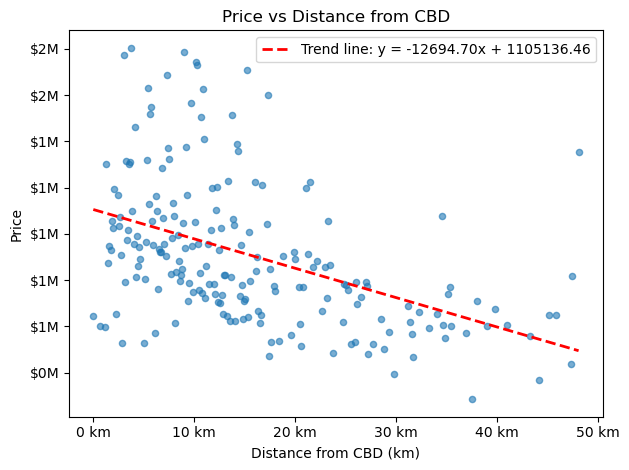

In [4]:
# Plot Distance vs Price from the existing dataframe
df_distance_price.plot(kind='scatter', x='Distance', y='Price', alpha=0.6)

# Calculate trend line (linear regression)
x = df_distance_price['Distance']
y = df_distance_price['Price']

# Fit a first-degree polynomial (linear regression)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(x, p(x), "r--", linewidth=2, label=f'Trend line: y = {z[0]:.2f}x + {z[1]:.2f}')

plt.xlabel('Distance from CBD (km)')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'${y/1000000:.0f}M'))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f} km'))
plt.title('Price vs Distance from CBD')
plt.tight_layout()
plt.legend()
plt.show()

#### Geospatial Hotspot Analysis

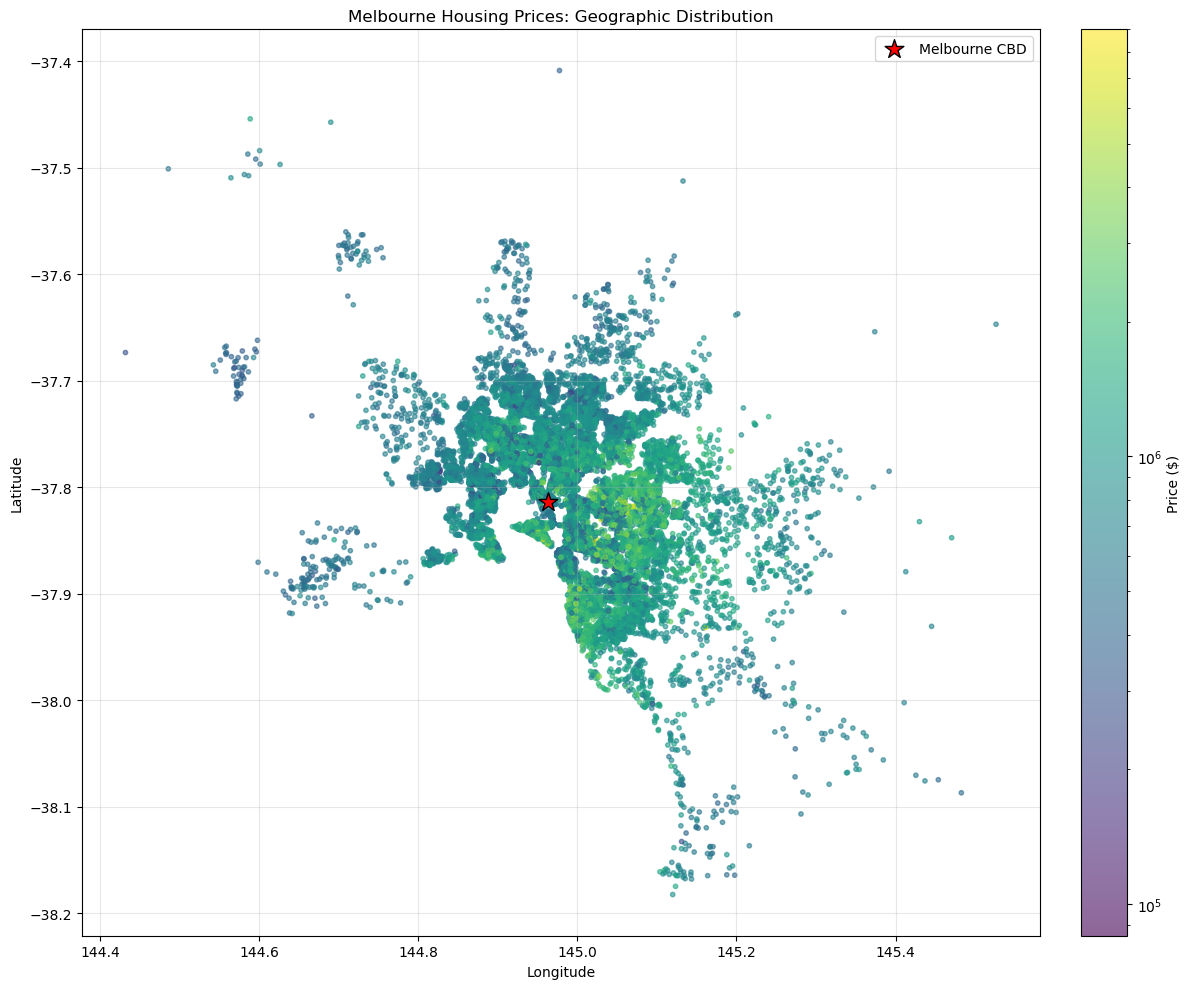

In [5]:
plt.figure(figsize=(12, 10))

# Create a scatter plot colored by price
scatter = plt.scatter(df['Longtitude'], df['Lattitude'],
                      c=df['Price'], 
                      cmap='viridis',
                      s=10,  # Size of points
                      alpha=0.6,
                      norm=LogNorm())  # Log scale for better visualization

plt.colorbar(scatter, label='Price ($)', fraction=0.046, pad=0.04)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Melbourne Housing Prices: Geographic Distribution')
plt.grid(alpha=0.3)

# Add CBD marker
plt.scatter(144.9631, -37.8136, color='red', s=200, marker='*', 
           label='Melbourne CBD', edgecolors='black')
plt.legend()

plt.tight_layout()
plt.show()